In [45]:
# Problem 2: determining max. slope angle

In [126]:
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from random import randint
from sklearn import preprocessing
from sklearn import utils
from sklearn.utils import shuffle
from sklearn import svm
import os.path
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import scikeras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Loading dataset

In [157]:
# loading dataset for problem 2
# Update relevant path to X2 and Y2 files
X2 = pd.read_excel('X2.xlsx')
Y = pd.read_excel('Y2.xlsx')
X2=X2.drop(Y.columns[0], axis=1)
Y=Y.drop(Y.columns[0], axis=1)
Y=np.array(Y)
Y=np.ravel(Y)
X2=np.array(X2)


# Support Vector Regression

In [197]:
# Normalization
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
# Support vector machine regression
svr = SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1)
svr.fit(X_trainT, y_train)
# Predict on new data
y_rf = svr.predict(X_testT)
svrscore=svr.score(X_testT, y_test, sample_weight=None)
svrscore

0.8822557187392275

In [198]:
RMSE_SVR=(mean_squared_error(y_test, y_rf))**0.5
RMSE_SVR

3.5662508065024947

# Support Vector Classification

In [220]:
scaler = MinMaxScaler()
# converting y to categorical values
lab = preprocessing.LabelEncoder()
Y_t = lab.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X2, Y_t, test_size=0.2, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
# Support vector machine classification
svc = svm.SVC()
svc.fit(X_trainT, y_train)
# Predict on new data
y_svc = svc.predict(X_testT)
svcscore=svc.score(X_testT, y_test, sample_weight=None)
svcscore

0.55

In [221]:
# converting y values from classes to angles
y_test=45+5.625*y_test
y_svc=45+5.625*y_svc
RMSE_SVC=(mean_squared_error(y_test, y_svc))**0.5
RMSE_SVC

4.357106264483344

# Random Forest Classification

In [228]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X2, Y_t, test_size=0.2, random_state=42)
class_rf = RandomForestClassifier(max_depth=80, random_state=123)
class_rf.fit(X_train, y_train)
# Predict on new data
y_rf = class_rf.predict(X_test)
forestscoreC=class_rf.score(X_test, y_test, sample_weight=None)
forestscoreC

0.60625

In [229]:
# converting y values from classes to angles
y_testA=45+5.625*y_test
y_rfA=45+5.625*y_rf
# RMSE
RMSE_RFC=(mean_squared_error(y_testA, y_rfA))**0.5
RMSE_RFC

4.288486129306005

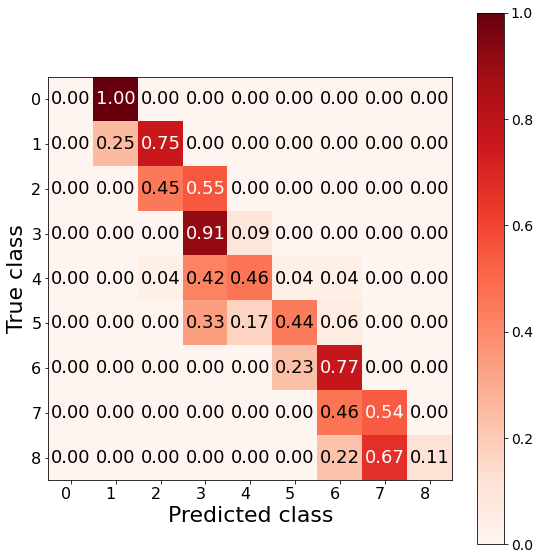

In [232]:
# confusion matrix
cm = confusion_matrix(y_test, y_rf)
classes = unique_labels(y_test, y_rf)

# normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Reds)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_normalized.shape[1]),
       yticks=np.arange(cm_normalized.shape[0]),
       xticklabels=classes, yticklabels=classes,
       ylabel='True class',
       xlabel='Predicted class')
# set the font size of the tick labels and title
ax.tick_params(axis='both', which='major', labelsize=16)

# set the font size of the x and y labels
ax.set_xlabel(ax.get_xlabel(), fontsize=22)
ax.set_ylabel(ax.get_ylabel(), fontsize=22)

# rotate the xtick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# loop over the data and add the annotations
fmt = '.2f'
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        ax.text(j, i, format(cm_normalized[i, j], fmt),
                ha="center", va="center", fontsize=18,
                color="white" if cm_normalized[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

# Random forest resgression

In [194]:
# Random forest regression model
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
# Normalization- found unuseful
X_trainT=scaler.inverse_transform(X_trainT)
X_testT=scaler.inverse_transform(X_testT)
regr_rf = RandomForestRegressor(max_depth=80, random_state=123)
regr_rf.fit(X_trainT, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_testT)
forestscoreR=regr_rf.score(X_testT, y_test, sample_weight=None)
forestscoreR

0.897437353849611

In [195]:
# RMSE
RMSE_RFR=(mean_squared_error(y_test, y_rf))**0.5
RMSE_RFR

3.3675589786965765

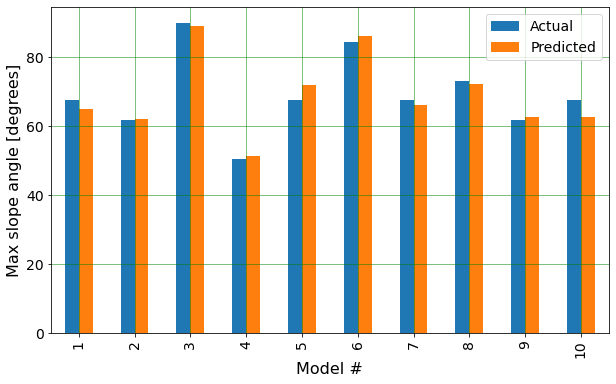

In [167]:
predictions = y_rf
y_test=np.array(y_test)
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_temp2 = df_temp2[1:11]
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Model #', fontsize=16)
plt.ylabel('Max slope angle [degrees]', fontsize=16)
plt.show()

# KNeighbors Regression

In [168]:
neigh = KNeighborsRegressor(n_neighbors=5) # neighbors=5 found to be optimal
y_trainC=y_train.round()
y_testC=y_test.round()
KNR=neigh.fit(X_trainT, y_trainC)
y_knn = KNR.predict(X_testT)
RMSE_KNR=(mean_squared_error(y_testC, y_knn))**0.5
print(RMSE_KNR)

6.331653285938304


# KNeighbors Classification

In [169]:
neigh = KNeighborsClassifier(n_neighbors=6)
KNC=neigh.fit(X_trainT, y_trainC)
y_knc = KNC.predict(X_testT)
RMSE_KNC=(mean_squared_error(y_testC, y_knc))**0.5
print(RMSE_KNC)

8.31715095450359


# Plot of score vs. number of samples

In [32]:
nn=55
initial=50
delta=10
print("max. samples: ", initial+delta*nn)
ForestscoreC=np.zeros(nn)
ForestscoreR=np.zeros(nn)
ForestC_RMSE=np.zeros(nn)
ForestR_RMSE=np.zeros(nn)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

max. samples:  600


In [33]:
X22=np.array(X2)
ll=[]

for i in range(nn):
    j=int(initial+delta*i)
    ll.append(j)
    X22, Y_t=shuffle(X22, Y_t)
    X_train1=X22[0:int(0.8*j),:]
    y_train1=Y_t[0:int(0.8*j)]
    X_test1=X22[int(0.8*j):j,:]
    y_test1=Y_t[int(0.8*j):j]
        
    # Random forest model
    regr_rf = RandomForestRegressor(max_depth=80, random_state=42)
    regr_rf.fit(X_train1, y_train1)
    # Predict on new data
    y_rf = regr_rf.predict(X_test1)
    ForestscoreR[i]=regr_rf.score(X_test1, y_test1, sample_weight=None)
    y_testA=45+y_test1*5.625
    y_rfA=45+y_rf*5.625
    ForestR_RMSE[i]=(mean_squared_error(y_testA, y_rfA))**0.5

In [34]:
ll=[]

for i in range(nn):
    j=int(initial+delta*i)
    ll.append(j)
    X22, Y_t=shuffle(X22, Y_t)
    X_train1=X22[0:int(0.8*j),:]
    y_train1=Y_t[0:int(0.8*j)]
    X_test1=X22[int(0.8*j):j,:]
    y_test1=Y_t[int(0.8*j):j]
    # X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
    
    # Random forest model
    class_rf = RandomForestClassifier(max_depth=80, random_state=42)
    class_rf.fit(X_train1, y_train1)
    # Predict on new data
    y_rf = class_rf.predict(X_test1)
    ForestscoreC[i]=class_rf.score(X_test1, y_test1, sample_weight=None)
    y_testA=45+y_test1*5.625
    y_rfA=45+y_rf*5.625
    ForestC_RMSE[i]=(mean_squared_error(y_testA, y_rfA))**0.5

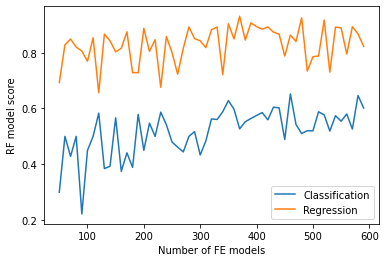

In [35]:
plt.plot(ll, ForestscoreC,label='Classification')
plt.plot(ll, ForestscoreR,label='Regression')
plt.legend(loc='lower right')
plt.xlabel('Number of FE models')
plt.ylabel('RF model score')
plt.rcParams.update({'font.size': 14})
plt.show()

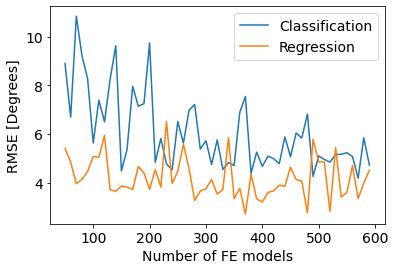

In [36]:
plt.plot(ll, ForestC_RMSE, label='Classification')
plt.plot(ll, ForestR_RMSE, label='Regression')
plt.legend(loc='upper right')
plt.xlabel('Number of FE models')
plt.ylabel('RMSE [Degrees]')
plt.rcParams.update({'font.size': 14})
plt.show()

## Data preparation for feature importance

In [94]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=0.3, random_state=42)
# Random forest regression model
regr_rf = RandomForestRegressor(max_depth=80, random_state=0)
regr_rf.fit(X_train2, y_train2)
# Predict on new data
y_rf = regr_rf.predict(X_test2)
forestscore=regr_rf.score(X_test2, y_test2, sample_weight=None)
forestscore

0.8963872961889273

Text(0, 0.5, 'Feature importance')

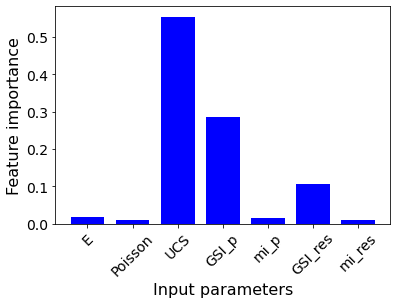

In [95]:
# feature importance
fi=regr_rf.feature_importances_
data = {'E':fi[0], 'Poisson':fi[1], 'UCS':fi[2],
        'GSI_p':fi[3], 'mi_p':fi[4], 'GSI_res':fi[5], 'mi_res':fi[6]}
models = list(data.keys())
values = list(data.values())
plt.bar(models, values, color ='Blue', width = 0.75)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Input parameters", fontsize=16)
plt.ylabel("Feature importance", fontsize=16)

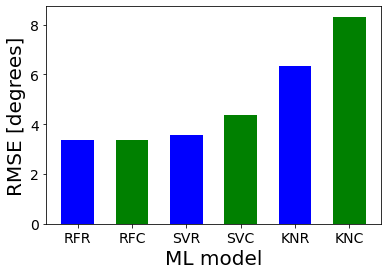

In [222]:
# Model Comparison

data = {'RFR':RMSE_RFR, 'RFC':RMSE_RFR, 'SVR':RMSE_SVR, 'SVC':RMSE_SVC,
       'KNR':RMSE_KNR, 'KNC':RMSE_KNC}
models = list(data.keys())
values = list(data.values())
c=['Blue', 'Green', 'Blue', 'Green', 'Blue', 'Green']
plt.bar(models, values, color =c, width = 0.6)
plt.xlabel("ML model", fontsize=20)
plt.ylabel("RMSE [degrees]", fontsize=20)
# plt.title("ML model performance", fontsize=16)

plt.show()

# Execution of surrogate model for investigating narrow range data

In [54]:
# Random forest regression model
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42)
regr_rf = RandomForestRegressor(max_depth=80, random_state=123)
regr_rf.fit(X_train, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_test)
forestscoreR=regr_rf.score(X_test, y_test, sample_weight=None)
forestscoreR

0.8965227888918299

In [63]:
n=10000 # number of iterations
E2=[]
Poisson2=0.25
UCS2=[]
UCS3=[]
GSI_p2=[]
GSI_p3=[]
mi_p2=9
GSI_res2=5
mi_res2=5
Xm2=[]
Xm3=[]

for i in range(n):
    Em = 600
    UCS_mean=15
    UCS_range=10
    UCSm2=UCS_mean-0.5*UCS_range+UCS_range*np.random.random_sample()
    UCS_mean=25
    UCS_range=10
    UCSm3=UCS_mean-0.5*UCS_range+UCS_range*np.random.random_sample()
    GSI_mean=15
    GSI_range=10
    GSI_pm2=GSI_mean-0.5*GSI_range+GSI_range*np.random.random_sample()
    GSI_mean=20
    GSI_range=10
    GSI_pm3=GSI_mean-0.5*GSI_range+GSI_range*np.random.random_sample()
    X2=np.array([Em, Poisson2, UCSm2, GSI_pm2, mi_p2, GSI_res2, mi_res2])
    X3=np.array([Em, Poisson2, UCSm3, GSI_pm3, mi_p2, GSI_res2, mi_res2])
    Xm2.append(X2)
    Xm3.append(X3)
    
depth2=regr_rf.predict(Xm2)
depth3=regr_rf.predict(Xm3)

61.696628499999946
75.39917310000006


c:\users\amichai\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
c:\users\amichai\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [64]:
distY2=np.round(depth2)
distY2=distY2.astype(int) 
distY2=pd.DataFrame(distY2, columns = ['depth'])
distY2=distY2.groupby(['depth'])['depth'].count()
distY2=distY2.sort_index()
distY3=np.round(depth3)
distY3=distY3.astype(int)
distY3=pd.DataFrame(distY3, columns = ['depth'])
distY3=distY3.groupby(['depth'])['depth'].count()
distY3=distY3.sort_index()

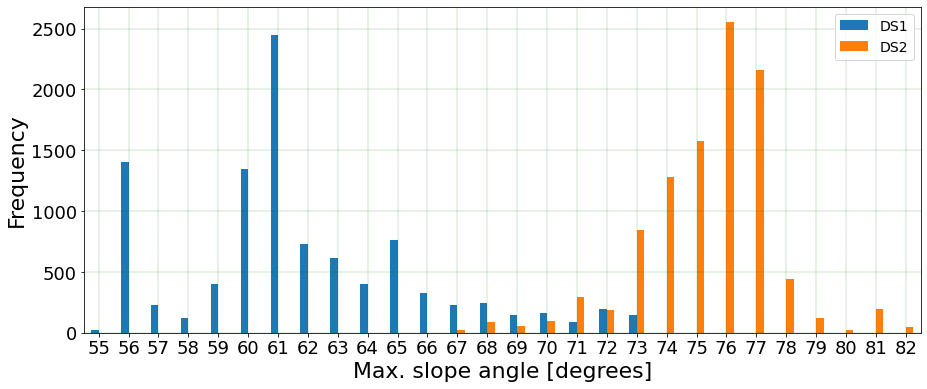

In [65]:
# plot of distribution of max. slope angle for narrow range of data
df_temp2 = pd.DataFrame({'DS1': distY2, 'DS2': distY3})
df_temp2.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Max. slope angle [degrees]', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.show()